<a href="https://colab.research.google.com/github/pattom72/other/blob/master/day4_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

In [0]:
%load_ext tensorboard

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/matrix_three_road_signs/"

/content/drive/My Drive/Colab Notebooks/matrix_three_road_signs


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

In [0]:
x_train, y_train  = train['features'], train['labels']
x_test, y_test  = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                    Flatten(),
                    Dense(num_classes, activation='softmax'),
])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train)

1088/1088 [==============================] - 49s 45ms/step - loss: 14.0927 - accuracy: 0.7787


In [0]:
def get_cnn_v1(input_shape, num_classes):
 return Sequential([
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    
    Flatten(),
    
    Dense(num_classes, activation='softmax'),
 ])

In [0]:
def train_model(model, x_train, y_train, params_fit={}):
  
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      x_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (x_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [0]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, x_train, y_train)

Epoch 1/5
272/272 [==============================] - 46s 170ms/step - loss: 18.0344 - accuracy: 0.7719 - val_loss: 0.2315 - val_accuracy: 0.9385
Epoch 2/5
272/272 [==============================] - 47s 172ms/step - loss: 0.1914 - accuracy: 0.9568 - val_loss: 0.1203 - val_accuracy: 0.9738
Epoch 3/5
272/272 [==============================] - 46s 171ms/step - loss: 0.1155 - accuracy: 0.9733 - val_loss: 0.1281 - val_accuracy: 0.9760
Epoch 4/5
272/272 [==============================] - 46s 169ms/step - loss: 0.1378 - accuracy: 0.9682 - val_loss: 0.1250 - val_accuracy: 0.9729
Epoch 5/5
272/272 [==============================] - 46s 168ms/step - loss: 0.0923 - accuracy: 0.9784 - val_loss: 0.0974 - val_accuracy: 0.9761


In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
y_pred_prob = model_trained.predict(x_test)
y_pred_prob

array([[7.9479444e-12, 7.0656924e-06, 2.6133429e-04, ..., 2.4276729e-04,
        1.7327722e-05, 1.1506142e-05],
       [1.0978399e-09, 2.7113976e-05, 2.5059474e-03, ..., 4.3423235e-05,
        7.5815791e-07, 3.1209079e-06],
       [3.1361115e-11, 1.8757251e-05, 2.2653740e-05, ..., 2.3772987e-03,
        3.6734197e-04, 5.0315098e-04],
       ...,
       [7.3067248e-03, 4.2641245e-02, 1.8292291e-02, ..., 1.6317733e-02,
        2.5218997e-02, 1.1488552e-02],
       [5.0174389e-03, 3.1545095e-02, 1.7016172e-02, ..., 1.7021881e-02,
        1.9403605e-02, 9.7864429e-03],
       [7.9288185e-03, 4.4080269e-02, 1.5942119e-02, ..., 1.1287838e-02,
        1.2427984e-02, 2.8589857e-03]], dtype=float32)

In [0]:
y_pred_prob[400]

array([5.15751026e-07, 9.99996424e-01, 3.52229843e-11, 2.29970609e-11,
       3.05094068e-06, 5.26405699e-12, 2.99002874e-13, 1.16879334e-15,
       1.24017568e-21, 6.39876548e-17, 2.79163361e-15, 1.74891066e-18,
       7.91823425e-23, 2.31693082e-25, 8.33229009e-19, 5.79101651e-19,
       6.21265450e-22, 1.38232559e-26, 5.50786799e-14, 3.32754118e-36,
       1.46825639e-30, 2.46083208e-19, 0.00000000e+00, 2.21649607e-26,
       1.15691104e-20, 1.06078501e-24, 4.07339499e-22, 3.54441397e-24,
       1.09749952e-20, 2.39293597e-22, 1.75078462e-35, 3.24506139e-18,
       1.00451446e-25, 8.81937016e-27, 1.06655181e-22, 5.37757974e-18,
       0.00000000e+00, 2.96936550e-31, 8.58559291e-23, 1.17667596e-30,
       9.99767010e-25, 4.31876231e-27, 3.33131611e-19], dtype=float32)

In [0]:
np.argmax( y_pred_prob[400] )

1

<BarContainer object of 43 artists>

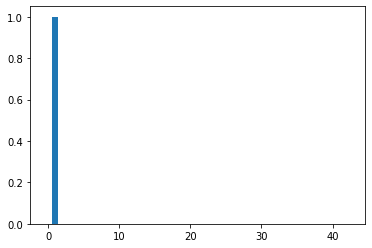

In [0]:
plt.bar(range(43), y_pred_prob[400])

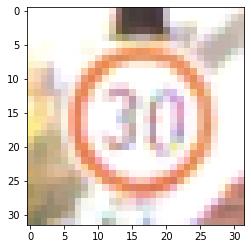

In [0]:
plt.imshow(x_test[400])

In [0]:
def predict(model_trained, x_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test,axis=1)
  y_pred_prob = model_trained.predict(x_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  return scoring(y_test_norm, y_pred)

In [0]:
predict(model_trained, x_test, y_test)

0.8065759637188209

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, x_train, y_train)
  return predict(model_trained, x_test, y_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
def get_cnn_v2(input_shape, num_classes):
 return Sequential([
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 71s 260ms/step - loss: 5.7939 - accuracy: 0.2312 - val_loss: 1.6418 - val_accuracy: 0.6116
Epoch 2/5
272/272 [==============================] - 70s 257ms/step - loss: 1.2480 - accuracy: 0.6348 - val_loss: 0.4261 - val_accuracy: 0.8992
Epoch 3/5
272/272 [==============================] - 71s 261ms/step - loss: 0.6461 - accuracy: 0.8065 - val_loss: 0.1970 - val_accuracy: 0.9629
Epoch 4/5
272/272 [==============================] - 71s 260ms/step - loss: 0.3977 - accuracy: 0.8826 - val_loss: 0.1027 - val_accuracy: 0.9788
Epoch 5/5
272/272 [==============================] - 70s 258ms/step - loss: 0.3010 - accuracy: 0.9104 - val_loss: 0.0621 - val_accuracy: 0.9882


0.9219954648526077

In [0]:
def get_cnn_v3(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 142s 522ms/step - loss: 2.1816 - accuracy: 0.5008 - val_loss: 0.4302 - val_accuracy: 0.8999
Epoch 2/5
272/272 [==============================] - 141s 517ms/step - loss: 0.5166 - accuracy: 0.8473 - val_loss: 0.1449 - val_accuracy: 0.9707
Epoch 3/5
272/272 [==============================] - 142s 524ms/step - loss: 0.2686 - accuracy: 0.9192 - val_loss: 0.0630 - val_accuracy: 0.9863
Epoch 4/5
272/272 [==============================] - 139s 511ms/step - loss: 0.1800 - accuracy: 0.9466 - val_loss: 0.0400 - val_accuracy: 0.9902
Epoch 5/5
272/272 [==============================] - 139s 512ms/step - loss: 0.1330 - accuracy: 0.9605 - val_loss: 0.0213 - val_accuracy: 0.9953


0.9707482993197278

In [0]:
def get_cnn_v4(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])
get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v4(input_shape, num_classes))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

0.9532879818594104

In [0]:
def get_cnn_v5(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 187s 689ms/step - loss: 2.5270 - accuracy: 0.3027 - val_loss: 1.1505 - val_accuracy: 0.6189
Epoch 2/5
272/272 [==============================] - 188s 689ms/step - loss: 0.9011 - accuracy: 0.7094 - val_loss: 0.2569 - val_accuracy: 0.9186
Epoch 3/5
272/272 [==============================] - 185s 682ms/step - loss: 0.4274 - accuracy: 0.8630 - val_loss: 0.1075 - val_accuracy: 0.9678
Epoch 4/5
272/272 [==============================] - 185s 679ms/step - loss: 0.2757 - accuracy: 0.9137 - val_loss: 0.0578 - val_accuracy: 0.9824
Epoch 5/5
272/272 [==============================] - 185s 680ms/step - loss: 0.2101 - accuracy: 0.9340 - val_loss: 0.0315 - val_accuracy: 0.9907


0.9700680272108844

In [0]:
x_train[0].shape

(32, 32, 3)

In [0]:
color.rgb2gray(x_train[0]).shape

(32, 32)

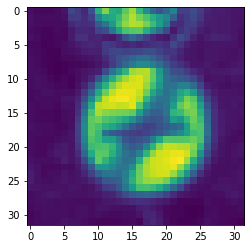

In [0]:
plt.imshow(color.rgb2gray(x_train[0]))

In [0]:
x_train_gray = color.rgb2gray(x_train).reshape(-1,32,32,1)
x_test_gray = color.rgb2gray(x_test).reshape(-1,32,32,1)

In [0]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, x_train_gray, y_train, params_fit={})
predict(model_trained,x_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 183s 673ms/step - loss: 2.7700 - accuracy: 0.2308 - val_loss: 0.7628 - val_accuracy: 0.7697
Epoch 2/5
272/272 [==============================] - 184s 676ms/step - loss: 0.5293 - accuracy: 0.8338 - val_loss: 0.1137 - val_accuracy: 0.9657
Epoch 3/5
272/272 [==============================] - 184s 676ms/step - loss: 0.2198 - accuracy: 0.9308 - val_loss: 0.0541 - val_accuracy: 0.9847
Epoch 4/5
272/272 [==============================] - 184s 677ms/step - loss: 0.1485 - accuracy: 0.9526 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 5/5
272/272 [==============================] - 183s 672ms/step - loss: 0.1164 - accuracy: 0.9645 - val_loss: 0.0305 - val_accuracy: 0.9911


0.964625850340136

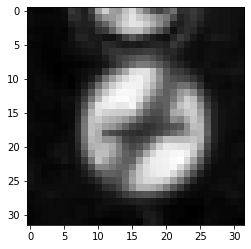

In [0]:
plt.imshow(color.rgb2gray(x_train[0]),cmap=plt.get_cmap('gray'))